# Select Dataset
* Appliances Energy Prediction: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
* Experimental data used to create regression models of appliances energy use in a low energy building.

In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
appliances_energy_prediction = fetch_ucirepo(id=374) 
  
# data (as pandas dataframes) 
X = appliances_energy_prediction.data.features 
y = appliances_energy_prediction.data.targets 
  
# metadata 
print(appliances_energy_prediction.metadata) 
  
# variable information 
print(appliances_energy_prediction.variables) 

{'uci_id': 374, 'name': 'Appliances Energy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/374/data.csv', 'abstract': 'Experimental data used to create regression models of appliances energy use in a low energy building.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 19735, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Appliances'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VC8G', 'creators': ['Luis Candanedo'], 'intro_paper': {'title': 'Data driven prediction models of energy use of appliances in a low-energy house', 'authors': 'L. Candanedo, V. Feldheim, Dominique Deramaix', 'published_in': 'Energy and Buildings, Volume 140', 'year': 

# Create Correlation Matrix

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Drop the 'date' column from X
X.drop(columns=['date'], inplace=True)

# Concatenate features (X) and target (y) into a DataFrame
df = pd.concat([X, y], axis=1)
print(df)

       lights         T1       RH_1         T2       RH_2         T3  \
0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
...       ...        ...        ...        ...        ...        ...   
19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...     RH_9  T_out  \
0      44.730000  19.000000  45.566667  17.166667  ...  45.53

C:\Users\isabe\AppData\Local\Temp\ipykernel_9208\2158894807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['date'], inplace=True)


In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Concatenate standardized features and target into a DataFrame
df_standardized = pd.concat([pd.DataFrame(X_standardized, columns=X.columns), y], axis=1)
print(df_standardized)

         lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0      3.301264 -1.118645  1.843821 -0.520411  1.073683 -1.235063  1.686130   
1      3.301264 -1.118645  1.616807 -0.520411  1.057097 -1.235063  1.704566   
2      3.301264 -1.118645  1.517959 -0.520411  1.033550 -1.235063  1.748608   
3      4.561378 -1.118645  1.459321 -0.520411  1.024540 -1.235063  1.769092   
4      4.561378 -1.118645  1.526336 -0.520411  1.009797 -1.235063  1.769092   
...         ...       ...       ...       ...       ...       ...       ...   
19730 -0.479080  2.415962  1.583299  2.530318  0.394449  2.458745  0.590209   
19731 -0.479080  2.374452  1.568221  2.468301  0.407788  2.425512  0.608646   
19732  0.781035  2.374452  1.592514  2.411103  0.576982  2.383971  0.752037   
19733  0.781035  2.374452  1.691361  2.313256  0.642694  2.304213  0.629130   
19734  0.781035  2.374452  1.593351  2.244984  0.626828  2.270980  0.588161   

             T4      RH_4        T5  ...      RH_9 

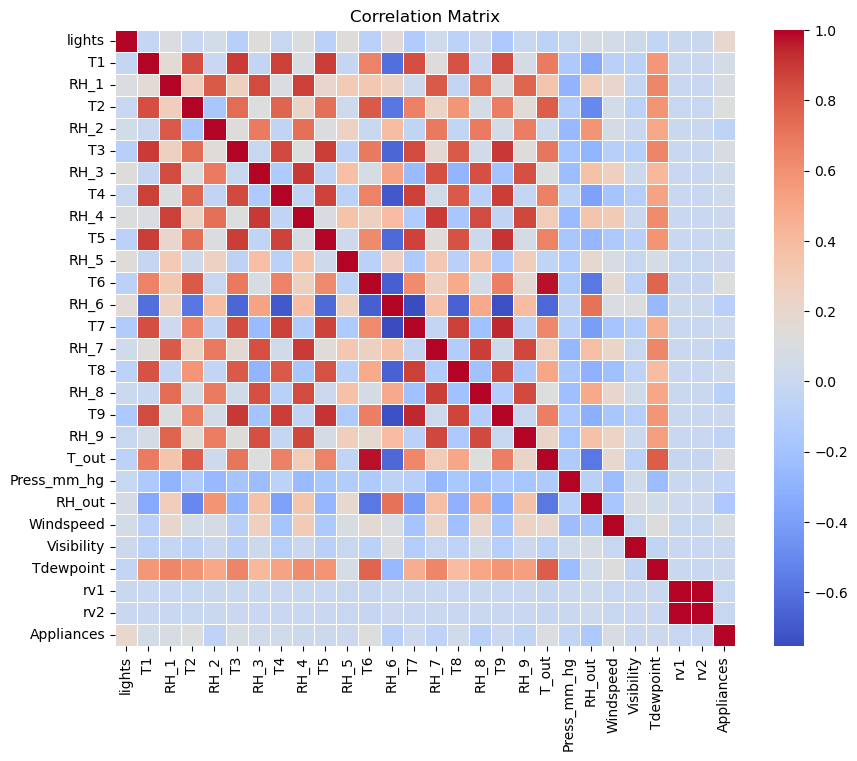

In [36]:
# Create a correlation matrix
correlation_matrix = df_standardized.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

On interpreting the correlation matrix:
* Positive correlation is indicated by warmer colors (closer to 1).
* Negative correlation is indicated by cooler colors (closer to -1).
* A value closer to 0 indicates little to no correlation.

# Highlight Pairs of Variables With Strong Correlations

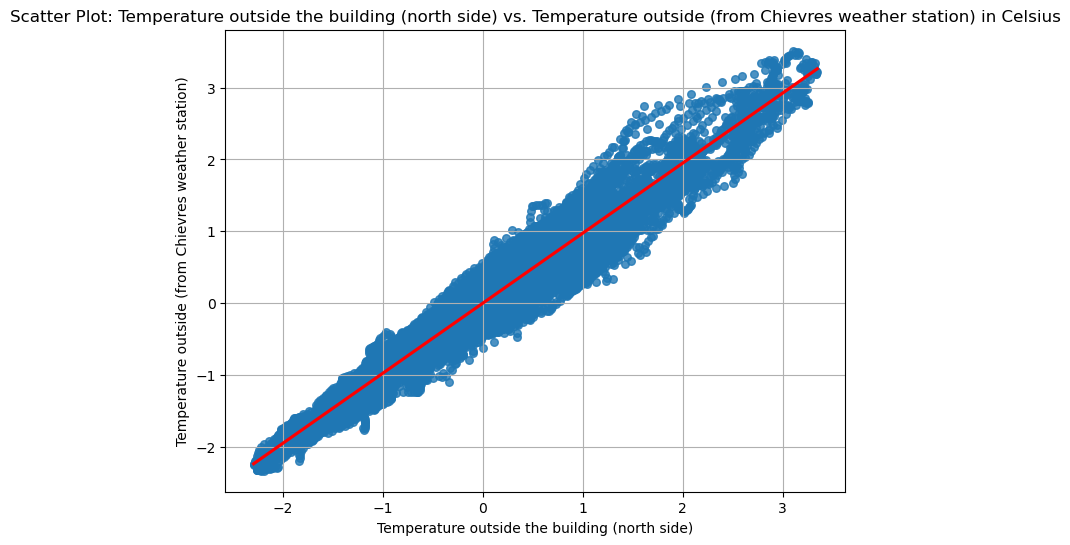

In [47]:
# Scatter plot with trend line for positive correlation: T6 vs. T_out
plt.figure(figsize=(8, 6))
sns.regplot(x='T6', y='T_out', data=df_standardized, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Temperature outside the building (north side) vs. Temperature outside (from Chievres weather station) in Celsius')
plt.xlabel('Temperature outside the building (north side)')
plt.ylabel('Temperature outside (from Chievres weather station)')
plt.grid(True)
plt.show()

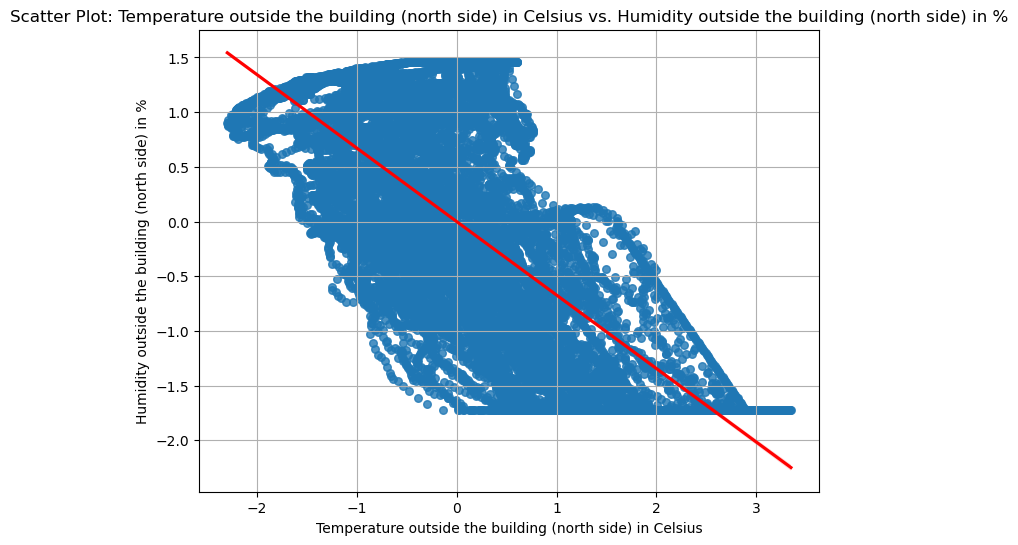

In [53]:
# Scatter plot with trend line for negative correlation: T6 vs. RH_6
plt.figure(figsize=(8, 6))
sns.regplot(x='T6', y='RH_6', data=df_standardized, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Temperature outside the building (north side) in Celsius vs. Humidity outside the building (north side) in %')
plt.xlabel('Temperature outside the building (north side) in Celsius')
plt.ylabel('Humidity outside the building (north side) in %')
plt.grid(True)
plt.show()